In [2]:
import numpy as np
import pandas as pd

* **id** - Unique ID for each home sold
* **date** - Date of the home sale
* **price** - Price of each home sold
* **bedrooms** - Number of bedrooms
* **bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* **sqft_living** - Square footage of the apartments interior living space
* **sqft_lot** - Square footage of the land space
* **floors** - Number of floors
* **waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not
* **view** - An index from 0 to 4 of how good the view of the property was
* **condition** - An index from 1 to 5 on the condition of the apartment,
* **grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* **sqft_above** - The square footage of the interior housing space that is above ground level

* **sqft_basement** - The square footage of the interior housing space that is below ground level

* **yr_built** - The year the house was initially built

* **yr_renovated** - The year of the house’s last renovation

* **zipcode** - What zipcode area the house is in

* **lat** - Lattitude

* **long** - Longitude

* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Exploratory Data Analysis

In [3]:
df = pd.read_csv('/content/kc_house_data.csv')

Examining data condition

In [4]:
df.shape

(21613, 21)

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Checking missing values

## Data Cleaning

Since 'id' doesn't bring any value for prediction, it just act as a primary key to diffrentiate between data points. We are setting it as index.

In [10]:
df = df.set_index('id')

Fixing date values to make it usable.

In [11]:
df['date']

id
7129300520    20141013T000000
6414100192    20141209T000000
5631500400    20150225T000000
2487200875    20141209T000000
1954400510    20150218T000000
                   ...       
263000018     20140521T000000
6600060120    20150223T000000
1523300141    20140623T000000
291310100     20150116T000000
1523300157    20141015T000000
Name: date, Length: 21613, dtype: object

In [12]:
df['date'] = pd.to_datetime(df['date'])
df['date']

id
7129300520   2014-10-13
6414100192   2014-12-09
5631500400   2015-02-25
2487200875   2014-12-09
1954400510   2015-02-18
                ...    
263000018    2014-05-21
6600060120   2015-02-23
1523300141   2014-06-23
291310100    2015-01-16
1523300157   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

# Feature Engineering
Extracting age from features.

In [13]:
df['date_year'] = df.date.dt.year
df['date_year']

id
7129300520    2014
6414100192    2014
5631500400    2015
2487200875    2014
1954400510    2015
              ... 
263000018     2014
6600060120    2015
1523300141    2014
291310100     2015
1523300157    2014
Name: date_year, Length: 21613, dtype: int64

In [14]:
df['age_built'] = df['date_year'] - df['yr_built']
df['age_built']

id
7129300520    59
6414100192    63
5631500400    82
2487200875    49
1954400510    28
              ..
263000018      5
6600060120     1
1523300141     5
291310100     11
1523300157     6
Name: age_built, Length: 21613, dtype: int64

# Feature Selection


Manual Selection. Removing unrelated and redundant data.

In [15]:
to_remove = [
    'date',
    'lat',
    'long',
    'yr_built',
    'yr_renovated',
    'date_year'
]

cleaned_df = df.drop(columns=to_remove)
cleaned_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age_built
id,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,59
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,63
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,82
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,49
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,1530,1509,5
6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,1830,7200,1
1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,1020,2007,5


Checking out the distribution of data on a higher level.

In [16]:
cleaned_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,98077.939805,1986.552492,12768.455652,43.317818
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,53.505026,685.391304,27304.179631,29.375493
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,399.000000,651.000000,-1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,1490.000000,5100.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,1840.000000,7620.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,2360.000000,10083.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,6210.000000,871200.000000,115.000000


In [ ]:
cleaned_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age_built
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,-0.053203,0.585379,0.082447,-0.053951
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.152668,0.391638,0.029244,-0.154324
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.203866,0.568634,0.087175,-0.506407
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.199430,0.756420,0.183286,-0.318488
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.129574,0.144608,0.718557,-0.052990
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,-0.059121,0.279885,-0.011269,-0.489640
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.030285,0.086463,0.030703,0.026093
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.084827,0.280439,0.072575,0.053458
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.003026,-0.092824,-0.003406,0.360665
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,-0.184862,0.713202,0.119248,-0.447415


Correlation Matrix with Heatmap. We can identify which feature most related to price.

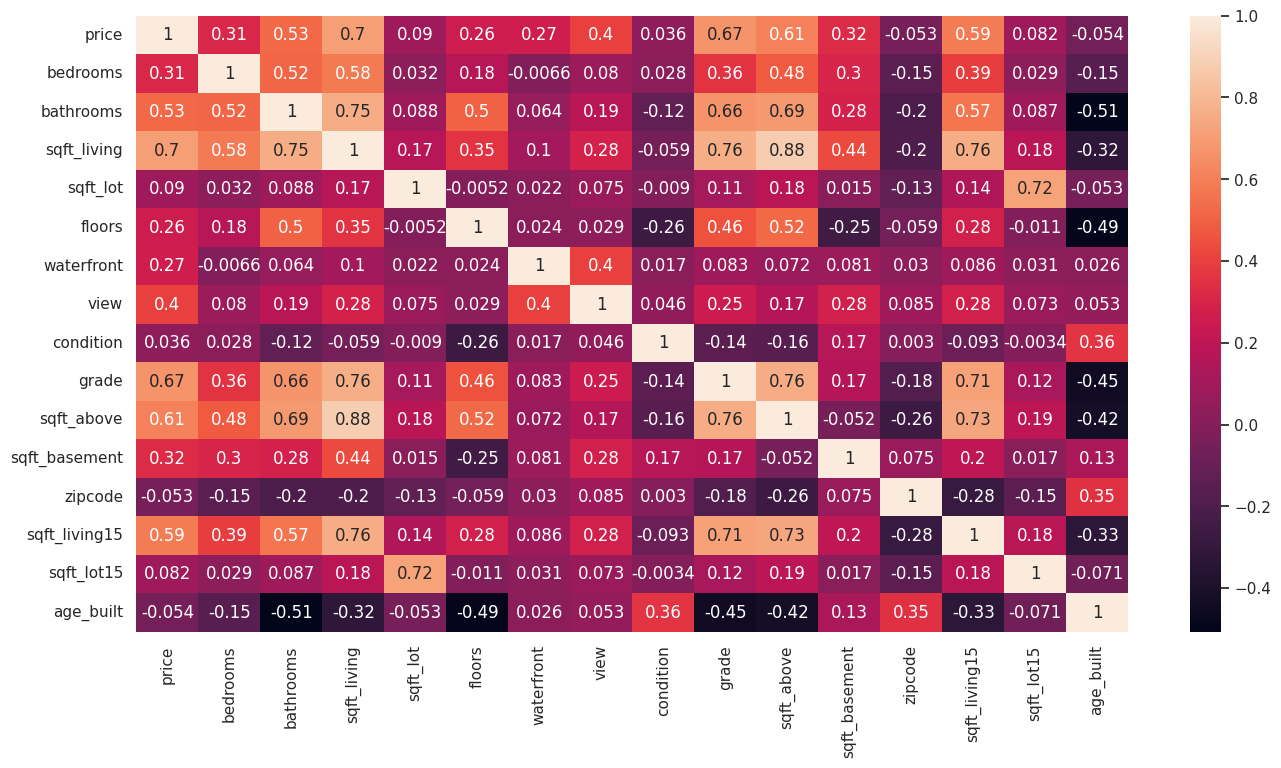

In [17]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})
import matplotlib.pyplot as plt

sns.heatmap(cleaned_df.corr(), annot=True)
plt.show()

What's the condition of our target data?

<Axes: ylabel='Frequency'>

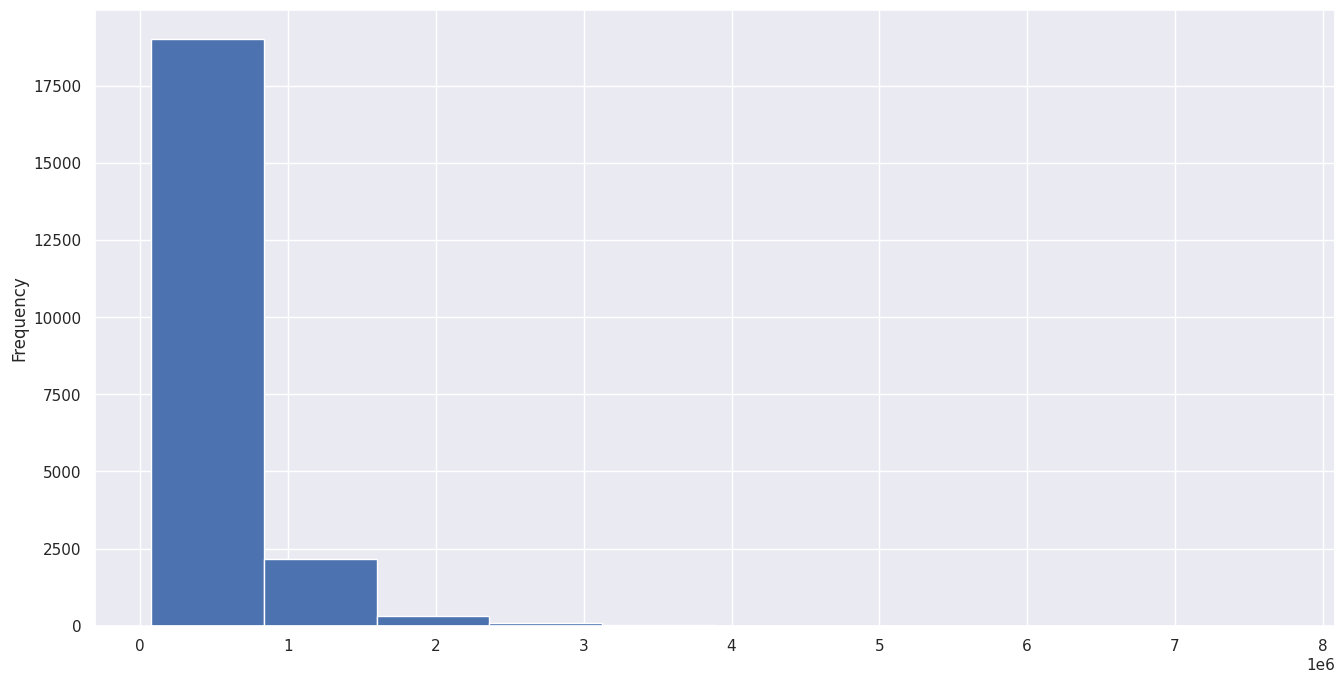

In [18]:
cleaned_df.price.plot.hist()

In [19]:
cleaned_df = cleaned_df[cleaned_df.price <= 2e6]

<Axes: ylabel='Frequency'>

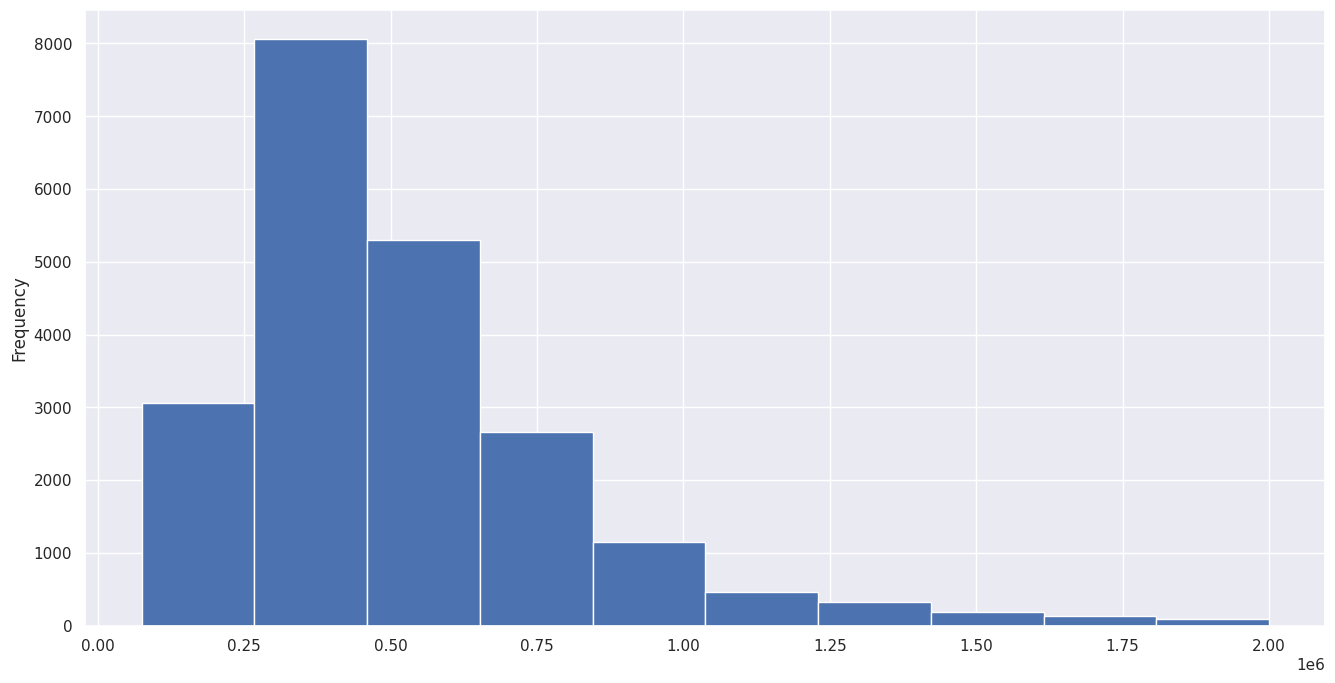

In [20]:
cleaned_df.price.plot.hist()

Spliting data into train and test.

In [21]:
X = cleaned_df.drop('price',1)
y = cleaned_df['price']

<ipython-input-21-3c7af33ce6b8>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = cleaned_df.drop('price',1)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Feature Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[0]

array([0.09090909, 0.4       , 0.19645293, 0.00080568, 0.8       ,
       0.        , 0.        , 0.5       , 0.58333333, 0.20196353,
       0.        , 0.58585859, 0.2654424 , 0.00132445, 0.00862069])

In [24]:
len((X_train[0]))

15

## Pearson Component Analysis (PCA)
Finding out the number of dimension (component).

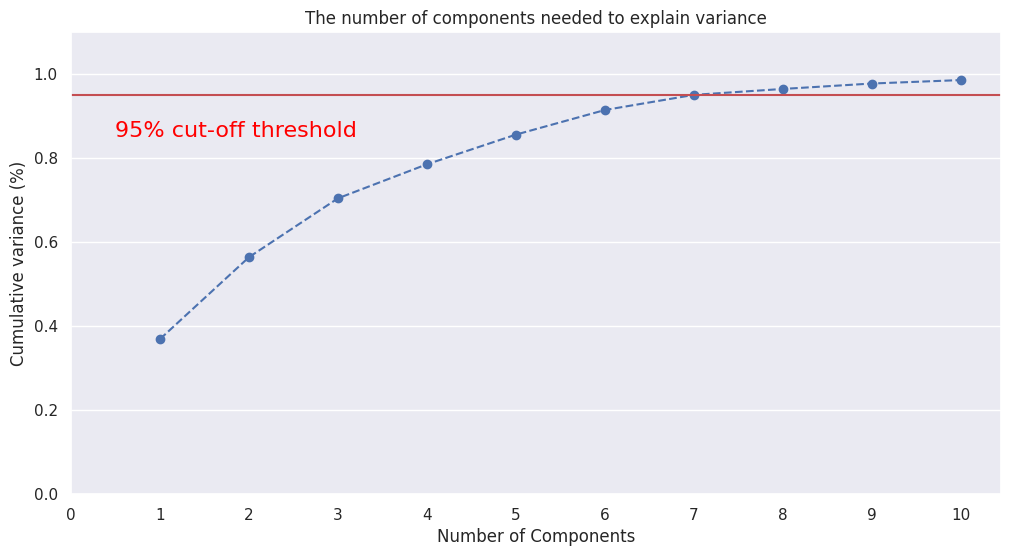

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10).fit(X_train)

# % matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Now, we can do it the easy way. Letting the library to decide it for us.

In [26]:
# feature extraction
pca = PCA(n_components=0.95)
pca = pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# summarize components
print("Explained Variance: %s" % pca.explained_variance_ratio_)
print(pca.components_)

Explained Variance: [0.36947484 0.19499365 0.14017253 0.08105317 0.07063818 0.05855835
 0.03605389]
[[ 0.02458613  0.18856241  0.19257089  0.00800383  0.40041118 -0.00587675
  -0.00491364 -0.16121548  0.17223143  0.22220717 -0.05300384 -0.47745511
   0.20237169  0.01180485 -0.62402545]
 [ 0.00445834  0.10337672  0.09153201 -0.00735549  0.44369007  0.02749272
   0.17132869 -0.19208193  0.10133634  0.09837295 -0.00934647  0.81881611
   0.04377209 -0.01073981 -0.15643092]
 [ 0.0448655   0.16100352  0.33270134  0.01584959 -0.13034882  0.08953832
   0.64831431  0.23823513  0.17934702  0.17626639  0.3625526  -0.07853213
   0.31230809  0.02112019  0.24539546]
 [ 0.01932632  0.03900141  0.08390661 -0.00118206  0.60922551 -0.03752212
  -0.25997185  0.39554391  0.05055804  0.18486194 -0.21565343 -0.12646011
   0.05114522 -0.00346879  0.5409281 ]
 [-0.05848401 -0.18625196 -0.30132731 -0.0011087   0.26677854  0.14192818
   0.64030085 -0.27194691 -0.13556695 -0.13006777 -0.39305093 -0.22423413
  -0

In [27]:
len((X_train[0]))

7

Univariate Selection - [One of good example](https://machinelearningmastery.com/feature-selection-machine-learning-python/#:~:text=1.%20Univariate%20Selection)

# Modeling
We will build a simple machine learning model, linear regression to predict the house price.

finally, model.fit()

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [29]:
y_pred = reg.predict(X_test)

In [33]:
from sklearn.tree import DecisionTreeRegressor
reg2 = DecisionTreeRegressor()
reg2.fit(X_train, y_train)


DecisionTreeRegressor()

In [34]:
y_pred2=reg2.predict(X_test)

# Evaluation
Now, lets find out how good is our model.

Coefficient of determination of the prediction, also known as R2 score. Basically it tells, how 'correct' is the predicted price with the targeted price.

In [30]:
reg.score(X_test, y_test)

0.6079109259145138

In [35]:
reg2.score(X_test, y_test)

0.45521392461665366

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# create data
x = range(len(y_pred))
y1 = y_test
y2 = y_pred

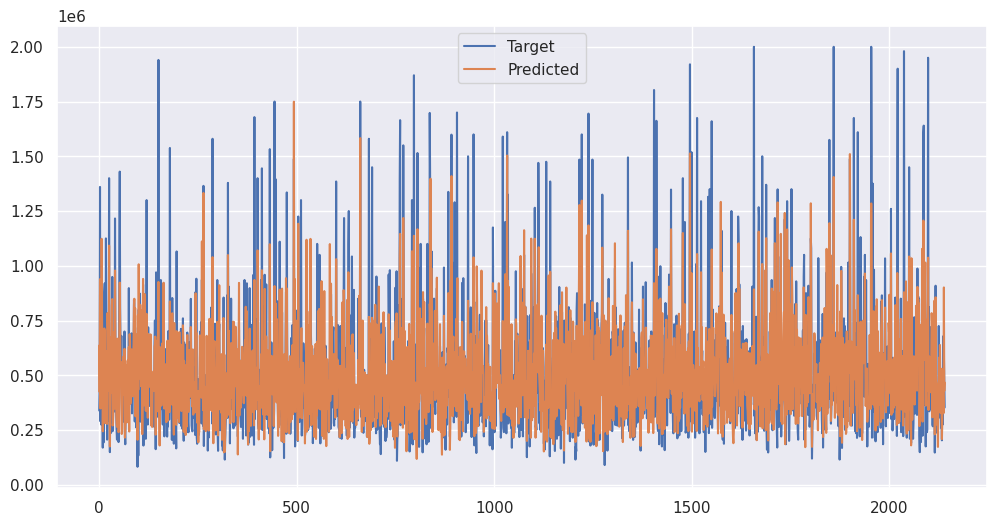

In [32]:
# plot lines
plt.plot(x, y1, label = "Target")
plt.plot(x, y2, label = "Predicted")
plt.legend()
plt.show()